In [61]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

boston = load_boston()
bos = pd.DataFrame(boston.data)

In [17]:
columns=boston.feature_names

In [18]:
bos.columns=columns

In [19]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
"""Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
"""

"Boston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  pu

In [21]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [22]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [23]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [24]:
import matplotlib.pyplot as sns
import seaborn as sns
len(bos.columns)

13

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


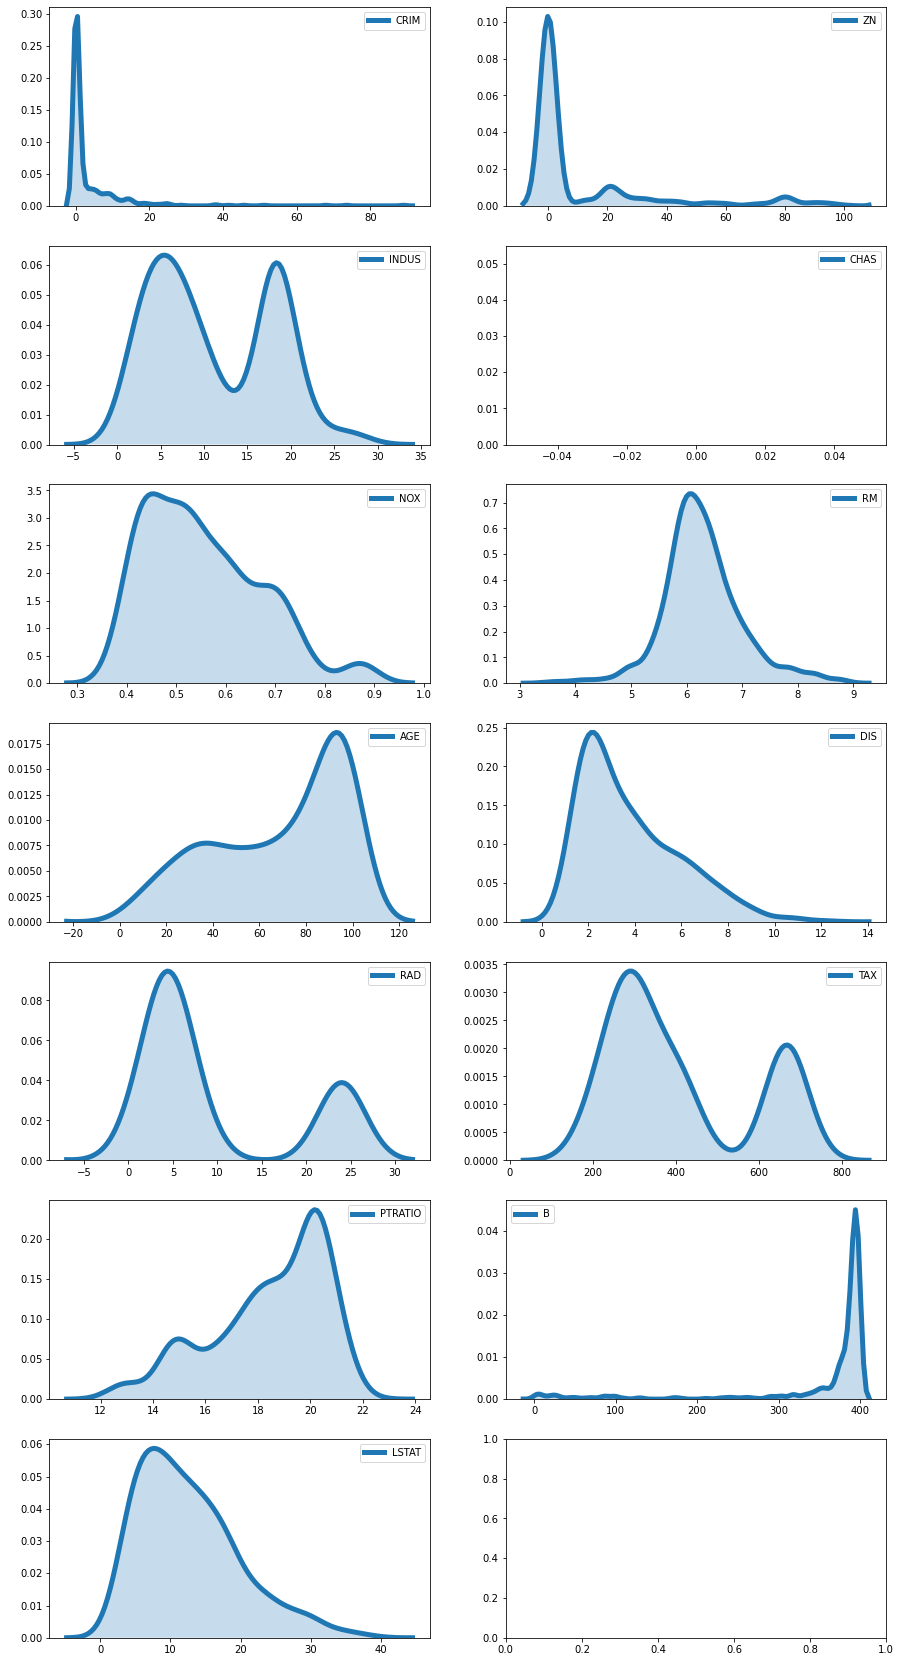

In [9]:

fig,ax=plt.subplots(7,2,figsize=(15,30),squeeze=False)
i,j=0,0
for col in bos.columns:
    sns.kdeplot(data=bos[col],ax=ax[i,j],shade=True,linewidth=5)
    j+=1
    if j==2 :
        i+=1
        j=0

0.0    471
1.0     35
Name: CHAS, dtype: int64

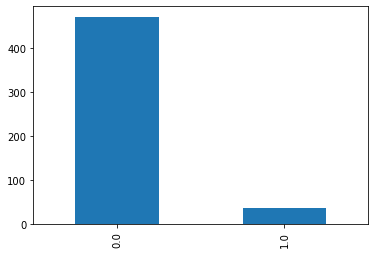

In [25]:
bos.CHAS.value_counts().plot(kind='bar')
bos.CHAS.value_counts()

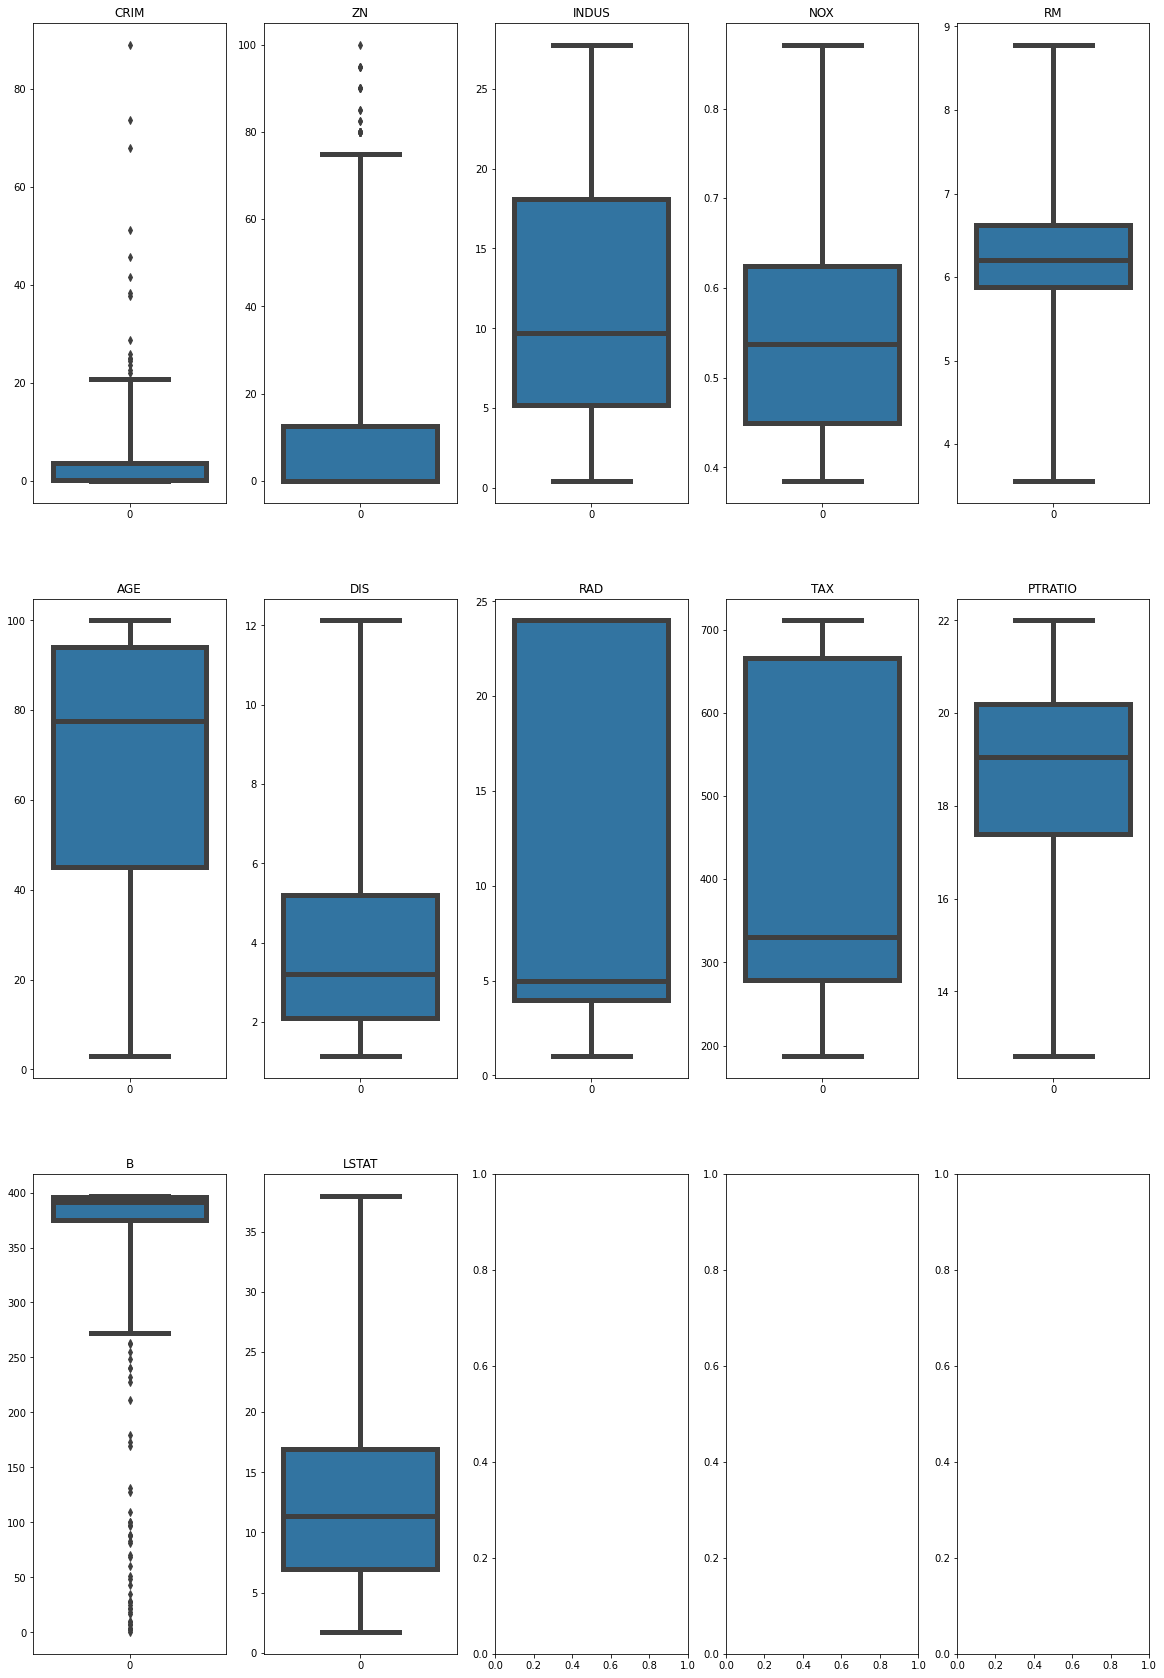

In [26]:
fig,ax=plt.subplots(3,5,figsize=(20,30),squeeze=False)
i,j=0,0
for col in bos.columns:
    if col in ['Price',"CHAS"] :
        continue
    sns.boxplot(data=bos[col],ax=ax[i,j],whis=5,linewidth=5)
    ax[i,j].set_title(col)
    j+=1
    if j==5 :
        i+=1
        j=0

In [27]:

for i in bos.columns :
    if i=='CHAS':
        continue
    print("\n",i)
    b=0
    Q1=bos[i].quantile(0.25)
    Q3=bos[i].quantile(0.75)
    IQR=Q3-Q1
    print(Q1,Q3,IQR)
    for idx,j in enumerate(bos[i]):
        if j>Q3+5*IQR or j<Q1-5*IQR:
            b+=1
            bos.loc[idx,i]=bos[i].mean()
    print(f"No. of outliers :{b}")      


 CRIM
0.08204499999999999 3.6770825 3.5950375
No. of outliers :16

 ZN
0.0 12.5 12.5
No. of outliers :29

 INDUS
5.19 18.1 12.91
No. of outliers :0

 NOX
0.449 0.624 0.175
No. of outliers :0

 RM
5.8855 6.6235 0.7379999999999995
No. of outliers :0

 AGE
45.025 94.07499999999999 49.04999999999999
No. of outliers :0

 DIS
2.100175 5.1884250000000005 3.0882500000000004
No. of outliers :0

 RAD
4.0 24.0 20.0
No. of outliers :0

 TAX
279.0 666.0 387.0
No. of outliers :0

 PTRATIO
17.4 20.2 2.8000000000000007
No. of outliers :0

 B
375.3775 396.225 20.847500000000025
No. of outliers :48

 LSTAT
6.949999999999999 16.955000000000002 10.005000000000003
No. of outliers :0


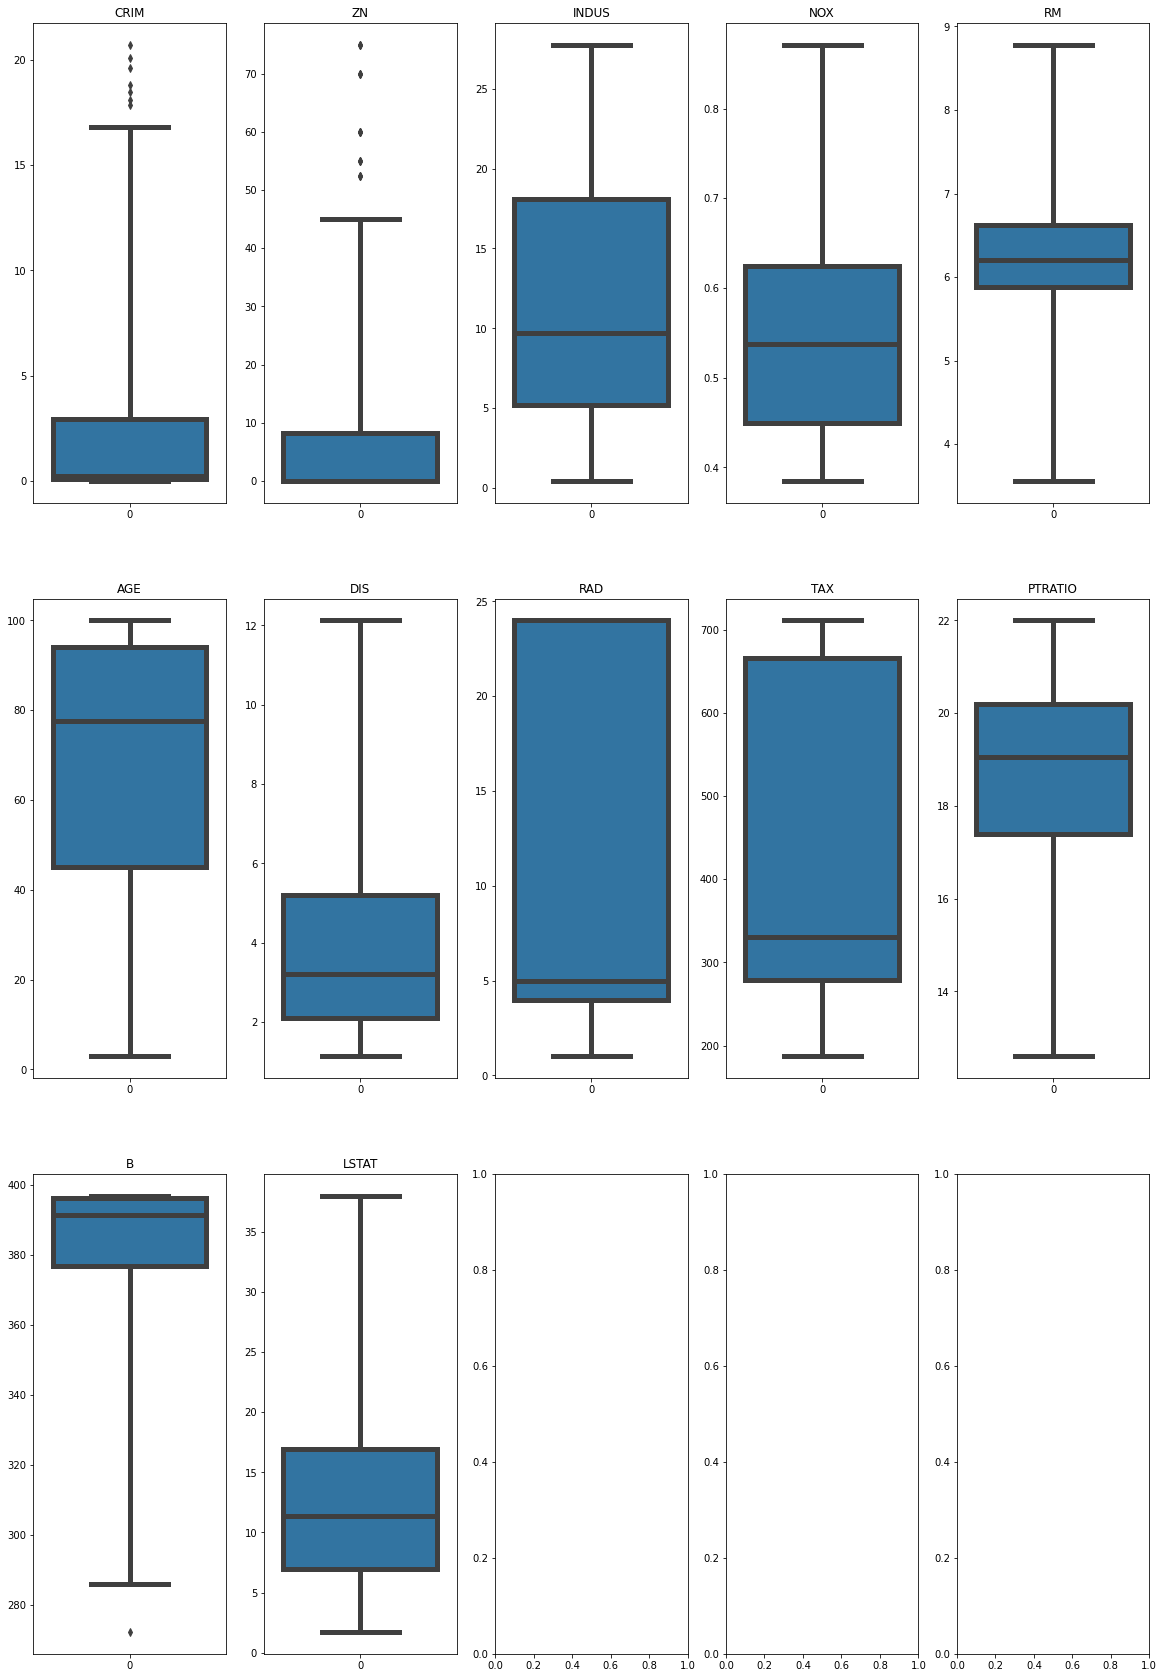

In [28]:
fig,ax=plt.subplots(3,5,figsize=(20,30),squeeze=False)
i,j=0,0
for col in bos.columns:
    if col in ['Price',"CHAS"] :
        continue
    sns.boxplot(data=bos[col],ax=ax[i,j],whis=5,linewidth=5)
    ax[i,j].set_title(col)
    j+=1
    if j==5 :
        i+=1
        j=0

In [92]:

scaler.fit_transform([[0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33]])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
scaler=StandardScaler()
bos_standardized=np.power(bos,0.5)
print(bos_standardized.head())
bos_standardized=pd.DataFrame(scaler.fit_transform(bos_standardized),columns=bos.columns)
print(bos_standardized.head())

       CRIM        ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.079498  4.242641  1.519868   0.0  0.733485  2.564176  8.074652  2.022375   
1  0.165257  0.000000  2.658947   0.0  0.684836  2.533969  8.882567  2.228699   
2  0.165197  0.000000  2.658947   0.0  0.684836  2.680485  7.816649  2.228699   
3  0.179917  0.000000  1.476482   0.0  0.676757  2.645373  6.767570  2.462154   
4  0.262774  0.000000  1.476482   0.0  0.676757  2.673387  7.362065  2.462154   

        RAD        TAX   PTRATIO          B     LSTAT     Price  
0  1.000000  17.204651  3.911521  19.922349  2.231591  4.898979  
1  1.414214  15.556349  4.219005  19.922349  3.023243  4.647580  
2  1.414214  15.556349  4.219005  19.819939  2.007486  5.890671  
3  1.732051  14.899664  4.324350  19.865296  1.714643  5.779273  
4  1.732051  14.899664  4.324350  19.922349  2.308679  6.016644  
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.902228  1.274035 -1.503533 -0.272599 

In [39]:
bos_standardized.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.902228,1.274035,-1.503533,-0.272599,-0.097656,0.437722,0.015300,0.278822,-1.396857,-0.644166,-1.453573,0.672314,-1.202689,0.262121
1,-0.825647,-0.563752,-0.456133,-0.272599,-0.738448,0.221513,0.426550,0.679364,-1.076581,-1.053383,-0.266921,0.672314,-0.399953,-0.006669
2,-0.825702,-0.563752,-0.456133,-0.272599,-0.738448,1.270210,-0.116031,0.679364,-1.076581,-1.053383,-0.266921,0.485008,-1.429933,1.322409
3,-0.812557,-0.563752,-1.543428,-0.272599,-0.844859,1.018895,-0.650040,1.132573,-0.830825,-1.216415,0.139631,0.567965,-1.726876,1.203306
4,-0.738568,-0.563752,-1.543428,-0.272599,-0.844859,1.219408,-0.347426,1.132573,-0.830825,-1.216415,0.139631,0.672314,-1.124522,1.457096


In [40]:
bos['Price']=boston.target
bos_standardized['Price']=boston.target
bos_standardized.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.902228,1.274035,-1.503533,-0.272599,-0.097656,0.437722,0.015300,0.278822,-1.396857,-0.644166,-1.453573,0.672314,-1.202689,24.0
1,-0.825647,-0.563752,-0.456133,-0.272599,-0.738448,0.221513,0.426550,0.679364,-1.076581,-1.053383,-0.266921,0.672314,-0.399953,21.6
2,-0.825702,-0.563752,-0.456133,-0.272599,-0.738448,1.270210,-0.116031,0.679364,-1.076581,-1.053383,-0.266921,0.485008,-1.429933,34.7
3,-0.812557,-0.563752,-1.543428,-0.272599,-0.844859,1.018895,-0.650040,1.132573,-0.830825,-1.216415,0.139631,0.567965,-1.726876,33.4
4,-0.738568,-0.563752,-1.543428,-0.272599,-0.844859,1.219408,-0.347426,1.132573,-0.830825,-1.216415,0.139631,0.672314,-1.124522,36.2


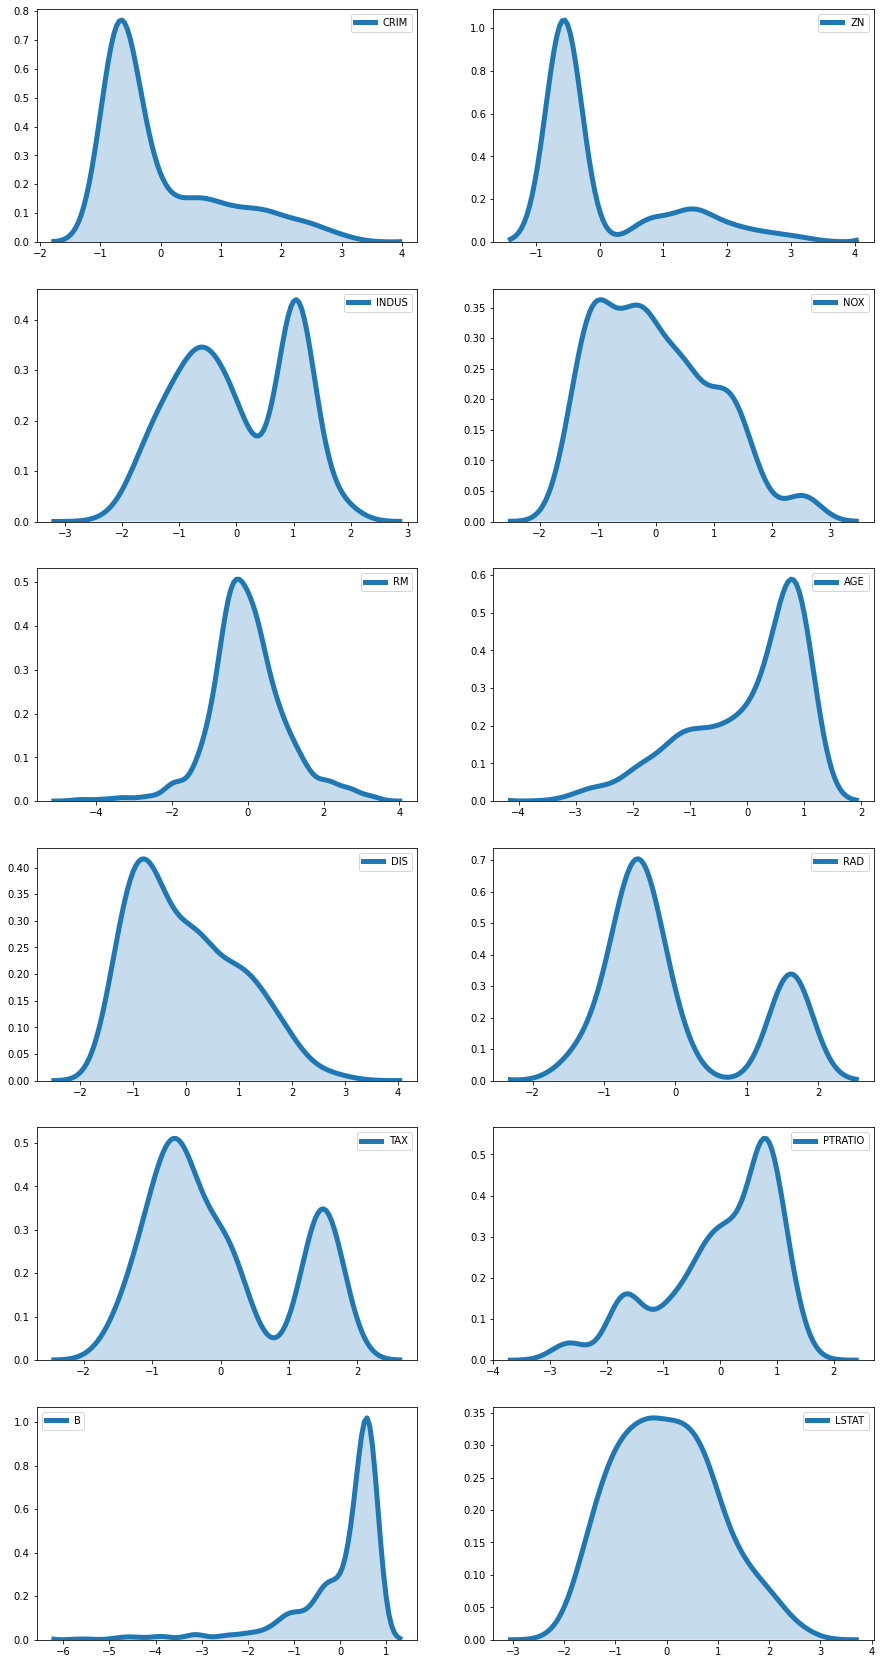

In [41]:

fig,ax=plt.subplots(6,2,figsize=(15,30),squeeze=False)
i,j=0,0
for col in bos_standardized.columns:
    if col in ['Price',"CHAS"] :
        continue
    sns.kdeplot(data=bos_standardized[col],ax=ax[i,j],shade=True,linewidth=5)
    j+=1
    if j==2 :
        i+=1
        j=0

In [42]:
bos_standardized.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.395591  0.662014 -0.005055  0.709776 -0.271809  0.525110   
ZN      -0.395591  1.000000 -0.576596 -0.034474 -0.523598  0.299856 -0.514013   
INDUS    0.662014 -0.576596  1.000000  0.073644  0.771084 -0.417057  0.606068   
CHAS    -0.005055 -0.034474  0.073644  1.000000  0.086869  0.087635  0.090145   
NOX      0.709776 -0.523598  0.771084  0.086869  1.000000 -0.311322  0.719191   
RM      -0.271809  0.299856 -0.417057  0.087635 -0.311322  1.000000 -0.234539   
AGE      0.525110 -0.514013  0.606068  0.090145  0.719191 -0.234539  1.000000   
DIS     -0.626382  0.602001 -0.746599 -0.093378 -0.826793  0.242236 -0.746179   
RAD      0.876495 -0.318756  0.599191  0.000995  0.621716 -0.213056  0.434632   
TAX      0.833596 -0.361009  0.707758 -0.036519  0.673476 -0.300879  0.470315   
PTRATIO  0.378885 -0.417385  0.404679 -0.119127  0.197050 -0.348636  0.239812   
B       -0.340893  0.190751 

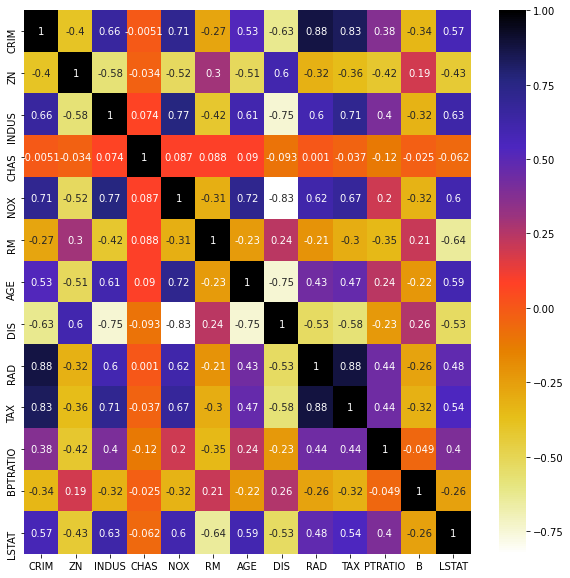

In [43]:
cor=bos_standardized.drop('Price',axis=1).corr()
print(cor)
fig=plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)

In [44]:
def correlation(data,threshold):
    col_corr=set()
    coo=set()
    cor=data.corr()
    for i in range(len(cor.columns)):
        for j in range(len(cor.columns)):
            if (abs(cor.iloc[i,j]) > threshold) and i!=j:
                print("\n",cor.columns[i],cor.columns[j])
                if cor.columns[j] in col_corr:
                    continue
                print(abs(cor.iloc[i,j]))
                colname=cor.columns[i]
                col_corr.add(colname)
    return col_corr

a=correlation(bos_standardized.drop('Price',axis=1),0.85)
print(a)



 CRIM RAD
0.8764952924839988

 RAD CRIM

 RAD TAX
0.8812129900663637

 TAX RAD
{'RAD', 'CRIM'}


In [45]:
bos_standardized_1=bos_standardized.drop(a,axis=1)
bos_standardized_1.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
0,1.274035,-1.503533,-0.272599,-0.097656,0.437722,0.015300,0.278822,-0.644166,-1.453573,0.672314,-1.202689,24.0
1,-0.563752,-0.456133,-0.272599,-0.738448,0.221513,0.426550,0.679364,-1.053383,-0.266921,0.672314,-0.399953,21.6
2,-0.563752,-0.456133,-0.272599,-0.738448,1.270210,-0.116031,0.679364,-1.053383,-0.266921,0.485008,-1.429933,34.7
3,-0.563752,-1.543428,-0.272599,-0.844859,1.018895,-0.650040,1.132573,-1.216415,0.139631,0.567965,-1.726876,33.4
4,-0.563752,-1.543428,-0.272599,-0.844859,1.219408,-0.347426,1.132573,-1.216415,0.139631,0.672314,-1.124522,36.2


In [46]:
bos_standardized.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.902228,1.274035,-1.503533,-0.272599,-0.097656,0.437722,0.015300,0.278822,-1.396857,-0.644166,-1.453573,0.672314,-1.202689,24.0
1,-0.825647,-0.563752,-0.456133,-0.272599,-0.738448,0.221513,0.426550,0.679364,-1.076581,-1.053383,-0.266921,0.672314,-0.399953,21.6
2,-0.825702,-0.563752,-0.456133,-0.272599,-0.738448,1.270210,-0.116031,0.679364,-1.076581,-1.053383,-0.266921,0.485008,-1.429933,34.7
3,-0.812557,-0.563752,-1.543428,-0.272599,-0.844859,1.018895,-0.650040,1.132573,-0.830825,-1.216415,0.139631,0.567965,-1.726876,33.4
4,-0.738568,-0.563752,-1.543428,-0.272599,-0.844859,1.219408,-0.347426,1.132573,-0.830825,-1.216415,0.139631,0.672314,-1.124522,36.2


In [47]:
X=bos_standardized.drop('Price',axis=1)
Y=bos_standardized.Price

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [51]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)
print(lm.score(X_test,Y_test))
print(lm.score(X_train,Y_train))
print(adj_r2(X_test,Y_test,lm.score(X_test,Y_test)))
print(adj_r2(X_train,Y_train,lm.score(X_train,Y_train)))

0.6826598349855044
0.7860351715323717
0.6527654716145737
0.77785416338508


In [52]:
X=bos_standardized_1.drop('Price',axis=1)
Y=bos_standardized_1.Price
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

lm=LinearRegression()
lm.fit(X_train,Y_train)
print(lm.score(X_test,Y_test))
print(lm.score(X_train,Y_train))
print(adj_r2(X_test,Y_test,lm.score(X_test,Y_test)))
print(adj_r2(X_train,Y_train,lm.score(X_train,Y_train)))

0.6686660360696346
0.7820347271656528
0.6426326531893916
0.7750241482148404


In [53]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV

In [54]:
def adj_r2(x,y,r2):
    n=x.shape[0]
    p=x.shape[1]
    adj_r2=1-((1-r2)*(n-1)/(n-p-1))
    return adj_r2

In [55]:
X=bos_standardized.drop('Price',axis=1)
Y=bos_standardized.Price
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

lassocv=LassoCV(alphas=None,cv=10,max_iter=1000000)
lassocv.fit(X_train,Y_train)
alpha=lassocv.alpha_
lasso=Lasso(alpha)
lasso.fit(X_train,Y_train)
print("R2 test score",lasso.score(X_test,Y_test))
print("R2 train score",lasso.score(X_train,Y_train))
print("Adj R2 test score",adj_r2(X_test,Y_test,lasso.score(X_test,Y_test)))
print("Adj R2 train score",adj_r2(X_train,Y_train,lasso.score(X_train,Y_train)))

R2 test score 0.679235306473216
R2 train score 0.7845316150245718
Adj R2 test score 0.649018342590258
Adj R2 train score 0.7762931179519819


In [56]:
X=bos_standardized.drop('Price',axis=1)
Y=bos_standardized.Price
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)


alphas=np.random.uniform(0,10,size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10)
ridgecv.fit(X_train,Y_train)
alpha=ridgecv.alpha_
ridge=Ridge(alpha)
ridge.fit(X_train,Y_train)
print("R2 test score",ridge.score(X_test,Y_test))
print("R2 train score",ridge.score(X_train,Y_train))
print("Adj R2 test score",adj_r2(X_test,Y_test,ridge.score(X_test,Y_test)))
print("Adj R2 train score",adj_r2(X_train,Y_train,ridge.score(X_train,Y_train)))


R2 test score 0.6774791455479888
R2 train score 0.7848085707565056
Adj R2 test score 0.647096746215553
Adj R2 train score 0.7765806631677837


In [57]:
import pickle

X=bos_standardized.drop('Price',axis=1)
Y=bos_standardized.Price
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
lm=LinearRegression()
lm.fit(X_train,Y_train)

filename='LinearReg.pickle'
pickle.dump(lm,open(filename,'wb'))

In [58]:
loaded_model=pickle.load(open(filename,'rb'))


In [59]:
a=loaded_model.predict(X_test)
loaded_model.score(X_test,Y_test)

0.6826598349855044